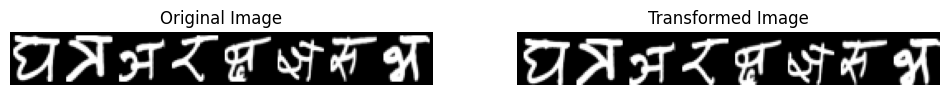

In [187]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.transform import AffineTransform, warp
import random

def random_transformation(image):
    """ Apply random transformations to an image to simulate natural variations. """
    angle = random.randint(-1, 1)  # Rotate by a small angle
    translate_x = random.randint(-2, 2)  # Translate image horizontally
    translate_y = random.randint(-2, 2)  # Translate image vertically
    scale = random.uniform(1, 1)  # Scale the image

    transform = AffineTransform(rotation=np.deg2rad(angle), translation=(translate_x, translate_y), scale=(scale, scale))
    transformed_image = warp(np.array(image), transform, mode='wrap', preserve_range=True).astype(np.uint8)
    return Image.fromarray(transformed_image)

def plot_transformations(image_path):
    original_image = Image.open(image_path)
    transformed_image = random_transformation(original_image)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(transformed_image)
    plt.title('Transformed Image')
    plt.axis('off')

    plt.show()

# Specify the path to your image file
image_path = "Word_Dataset/images/Words/word_0.png"
plot_transformations(image_path)


In [189]:
import os
import random
from PIL import Image, ImageDraw
import numpy as np
from skimage.transform import AffineTransform, warp

def random_transformation(image):
    angle = random.randint(-1, 1)  # Rotate by a small angle
    translate_x = random.randint(-2, 2)  # Translate image horizontally
    translate_y = random.randint(-2, 2)  # Translate image vertically
    scale = random.uniform(1, 1)  # Scale the image

    transform = AffineTransform(rotation=np.deg2rad(angle), translation=(translate_x, translate_y), scale=(scale, scale))
    transformed_image = warp(np.array(image), transform, mode='wrap', preserve_range=True).astype(np.uint8)
    return Image.fromarray(transformed_image)

def create_space(width, height=32, color=(0, 0, 0)):
    """ Create a variable width space to insert between words. """
    return Image.new('RGB', (width, height), color)

def create_sentence(data_dir, num_words):
    """ Create a sentence by concatenating words and applying random transformations and spaces. """
    words = []
    annotations = []
    spaces = []

    for _ in range(num_words):
        word_type = random.choice(['Words', 'StrikeOutWords'])
        word_dir = os.path.join(data_dir, 'images', word_type)
        word_choice = random.choice(os.listdir(word_dir))
        word_image = Image.open(os.path.join(word_dir, word_choice))
        transformed_word = random_transformation(word_image)
        words.append(transformed_word)
        
        # Fetch the corresponding annotation
        annotation_path = os.path.join(data_dir, 'annotations', word_type, word_choice.replace('.png', '.txt'))
        with open(annotation_path, 'r') as file:
            annotations.append(file.read().strip())

        # Decide the width of the space and its annotation
        if _ < num_words - 1:  # No space after the last word
            space_width = random.randint(10, 50)  # Random width for space
            space = create_space(space_width)
            spaces.append((space, '#' * (space_width // 10)))  # One '#' per 10 pixels of width

    # Concatenate images and spaces horizontally
    total_width = sum(w.size[0] for w in words) + sum(s[0].size[0] for s in spaces)
    max_height = max(w.size[1] for w in words)

    sentence_image = Image.new('RGB', (total_width, max_height))
    x_offset = 0
    space_annotations = []

    for i, word in enumerate(words):
        sentence_image.paste(word, (x_offset, (max_height - word.size[1]) // 2))
        x_offset += word.size[0]
        if i < len(spaces):
            space, space_annotation = spaces[i]
            sentence_image.paste(space, (x_offset, (max_height - space.size[1]) // 2))
            x_offset += space.size[0]
            space_annotations.append(space_annotation)

    # Combine annotations with space markers
    combined_annotations = []
    for annotation, spacer in zip(annotations, space_annotations + ['']):
        combined_annotations.append(annotation)
        combined_annotations.append(spacer)

    return sentence_image, ' '.join(combined_annotations).strip()

def generate_sentence_dataset(data_dir, output_dir, num_sentences):
    os.makedirs(output_dir, exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'images'), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'annotations'), exist_ok=True)

    for i in range(num_sentences):
        num_words = random.randint(2, 6)  # Random number of words in the sentence
        sentence_image, sentence_annotation = create_sentence(data_dir, num_words)

        # Save the sentence image and annotation
        sentence_image.save(os.path.join(output_dir, 'images', f'sentence_{i}.png'))
        with open(os.path.join(output_dir, 'annotations', f'sentence_{i}.txt'), 'w') as file:
            file.write(sentence_annotation)

# Example usage
data_directory = "Word_Dataset"
output_directory = "Sentence_Dataset"
total_sentences = 20000 # Set how many sentences you want to generate
generate_sentence_dataset(data_directory, output_directory, total_sentences)
